<a href="https://colab.research.google.com/github/Bhavana-sl/Co2-emission-project/blob/main/co2footprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

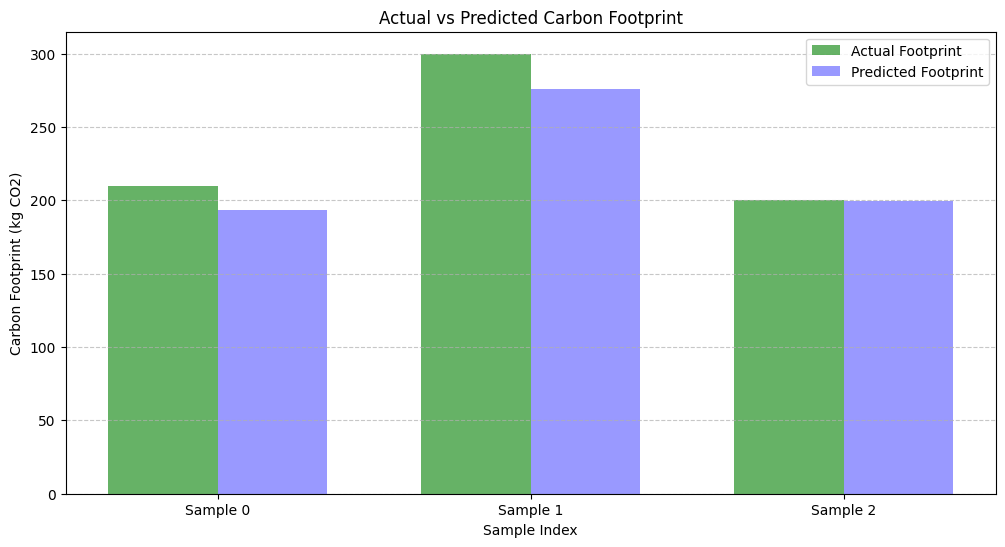

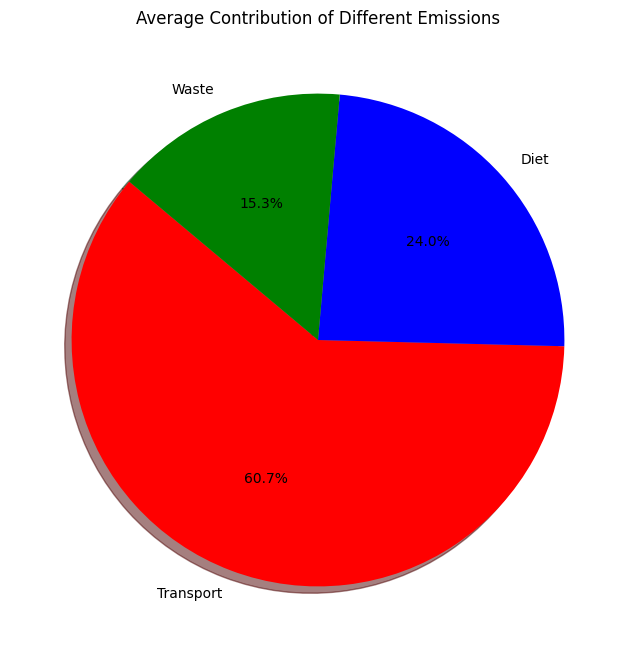

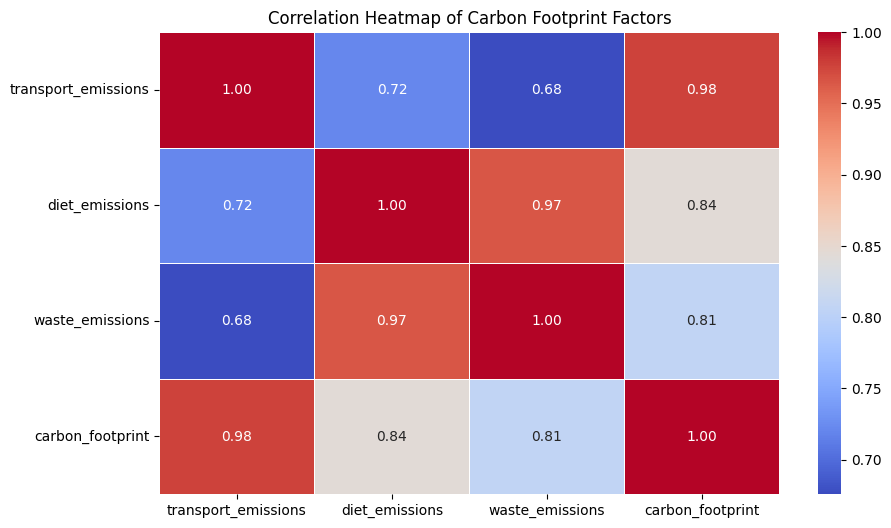

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load a dataset with more complexity (introducing noise and varied data)
data = {
    "transport_emissions": [120, 80, 100, 200, 150, 90, 50, 300, 250, 170, 95, 280],  # in kg CO2
    "diet_emissions": [50, 60, 55, 40, 70, 45, 50, 90, 85, 65, 60, 75],  # in kg CO2
    "waste_emissions": [30, 40, 35, 20, 45, 25, 30, 60, 50, 45, 40, 55],  # in kg CO2
    "carbon_footprint": [200, 180, 190, 260, 265, 160, 130, 450, 390, 300, 210, 400]  # total in kg CO2
}

# Create a DataFrame
df = pd.DataFrame(data)

# Features and target
X = df.drop("carbon_footprint", axis=1)
y = df["carbon_footprint"]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use a lightweight model (Linear Regression)
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Visualizing actual vs predicted carbon footprint with bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.35
indices = np.arange(len(y_test))

plt.bar(indices, y_test.values, bar_width, color='green', alpha=0.6, label='Actual Footprint')
plt.bar(indices + bar_width, y_pred, bar_width, color='blue', alpha=0.4, label='Predicted Footprint')

plt.title('Actual vs Predicted Carbon Footprint')
plt.xlabel('Sample Index')
plt.ylabel('Carbon Footprint (kg CO2)')
plt.xticks(indices + bar_width / 2, [f'Sample {i}' for i in range(len(y_test))])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Pie chart for emissions contribution
average_emissions = df.mean()
labels = ["Transport", "Diet", "Waste"]
sizes = [average_emissions["transport_emissions"], average_emissions["diet_emissions"], average_emissions["waste_emissions"]]
colors = ['red', 'blue', 'green']
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, shadow=True)
plt.title("Average Contribution of Different Emissions")
plt.show()

# Heatmap for correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Carbon Footprint Factors")
plt.show()

# New section